# <b>합성곱 신경망(CNN)</b>
<br><br>
## <b>전체 구조</b>

<br><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    [Review] 완전 연결(fullyconnected, 전결합) 
</span><br>

: 인접한 계층의 모든 뉴런과 결합하는 구조의 신경망

: (구현) Affine 계층을 통해

: (신경망 구조)
<div style="text-align: center"><b>(Affine - 활성화함수) - ...(반복)... - (Affine - Softmax)</b></div>
<img src = ".\deep_learning_images\fig 7-1.png" height = 70% width = 70% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>완전연결 계층으로 이루어진 네트워크 예</span></div>

<br><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    1. CNN(합성곱 신경망) 
</span><br>

: (신경망 구조)

- Pooling은 생략 가능
- 출력 계층에 가까운 층은 (Affine - 활성화함수) / (Affine - Softmax) 사용 가능

<br><br>

<div style="text-align: center"><b>(Conv - 활성화함수 - Pooling) - ...(반복)... - (Affine - Softmax)</b></div>
<img src = ".\deep_learning_images\fig 7-2.png" height = 70% width = 70% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>CNN으로 이루어진 네트워크 예</span></div>


<br><br>


## <b>CNN 시각화 하기</b>
<br><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    1. CNN이 보고있는 것은 무엇인가? 
</span><br>

: 계층이 깊어질수록 복잡하고 추상화된 정보가 추출됨

: 즉, 단순한 모양에서 '고급 정보'로 변화

: 다시 말해, 사물의 '의미'를 이해하도록 변화

: ex) AlexNet
<div style="text-align: center">단순한 엣지(경계선), 블롭(국소적으로 덩어리 진 영역)</div>
<br>
<div style="text-align: center"><b>▼</b></div>
<br>
<div style="text-align: center">Texture</div>
<br>
<div style="text-align: center"><b>▼</b></div>
<br>
<div style="text-align: center">사물의 일부에 반응</div>
<br>
<img src = ".\deep_learning_images\fig 7-26.png" height = 70% width = 70% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>AlexNet 각 층을 시각화</span></div>

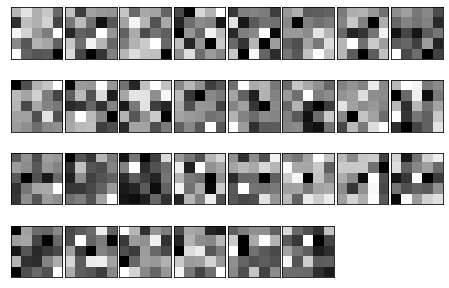

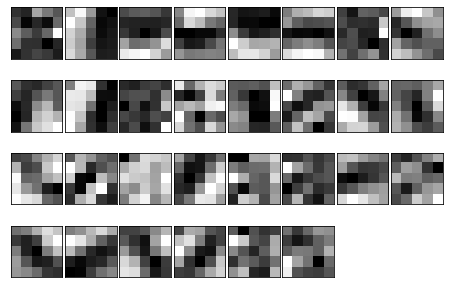

In [3]:
# MNIST 예제 첫 번재 층의 가중치 시각화 하기
# FILTER == 30개, 5X5, 1채널(회색조)

import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet


def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0,
                        right=1,
                        bottom=0,
                        top=1,
                        hspace=0.05,
                        wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i + 1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

## <b>대표적인 CNN Network</b>
<br><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    1. LeNet
</span><br>

: 1998년에 소개

: 손글씨 숫자를 인식하는 네트워크

: 특징

- 활성화 함수로 sigmoid 사용

- subsampling하여 중간 데이터 크기를 줄임

<br>
: 구조

<img src = ".\deep_learning_images\fig 7-27.png" height = 70% width = 70% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>LeNet 구조</span></div>


<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    2. AlexNet
</span><br>

: 2012년에 발표

: 특징

- 활성화 함수로 ReLU 사용

- LRN(Local Response Normalization)이라는 국소적 정규화를 실시하는 계층을 이용함

- dropout을 사용

<br>
: 구조

- 8개의 레이어로 구성됨 (5개의 conv layer / 3개의 full-connexted layer)

<br>
<img src = ".\deep_learning_images\fig 7-28.png" height = 70% width = 70% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>AlexNet 구조</span></div>

<br>
<img src = "https://t1.daumcdn.net/cfile/tistory/99FEB93C5C80B5192E" height = 70% width = 70% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>AlexNet 구조(GPU를 활용하여 병렬처리)</span></div>